In [1]:
import os
import requests
import pandas as pd
from bs4 import BeautifulSoup
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
import numpy as np
from math import pi
from urllib.request import urlopen
import matplotlib.patheffects as pe
from highlight_text import fig_text
from adjustText import adjust_text
from tabulate import tabulate
import matplotlib.style as style
import unicodedata
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

style.use('fivethirtyeight')

from PIL import Image
import urllib
import os
import math
from PIL import Image
import matplotlib.image as image
pd.options.display.max_columns = None

from highlight_text import fig_text
from adjustText import adjust_text
# from soccerplots.radar_chart import Radar
from mplsoccer import PyPizza, add_image, FontManager


warnings.filterwarnings('ignore') 

import sys
import os

# Add the directory containing FBREF_Aggregations.py to the Python path
module_path = os.path.abspath(os.path.join('/Users/stephenahiabah/Desktop/Code/cannoniq'))
if module_path not in sys.path:
    sys.path.append(module_path)

import FBREF_Aggregations as fbref



/Users/stephenahiabah/.pyenv/versions/3.11.0/lib/python3.11/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:

fb_ref_db = fbref.CreateFBRefDatabase()


CannonIQ_DB= fb_ref_db.generate_pitch_iq_scores()

In [3]:
player_phonebook = pd.read_csv('/Users/stephenahiabah/Desktop/Code/cannoniq/CSVs/24-25player_phonebook.csv')

In [14]:
# Step 1: Apply remove_accents to the Player column in AM_DB
CannonIQ_DB['player_name_match'] = CannonIQ_DB['Player'].apply(lambda x: fb_ref_db.remove_accents(x))

# Step 2: Rename the Player column in player_phonebook
player_phonebook = player_phonebook.rename(columns={'Player': 'player_name_match'})

# Step 3: Check for duplicates in player_phonebook
duplicates = player_phonebook[player_phonebook.duplicated('player_name_match', keep=False)]
print("Duplicates in player_phonebook:")
# print(duplicates)

# Step 4: Remove duplicates in player_phonebook (keep first occurrence)
player_phonebook = player_phonebook.drop_duplicates(subset='player_name_match', keep='first')

# Step 5: Join the DataFrames
CannonIQ_DB_extended = pd.merge(
    CannonIQ_DB,  # Left DataFrame
    player_phonebook[['player_name_match', 'scouting_url', 'match_logs']],  # Right DataFrame
    on='player_name_match',  # Join key
    how='left'  # Keep all rows from AM_DB
)

# Step 6: Verify the result
duplicates_merged = CannonIQ_DB[CannonIQ_DB.duplicated('Player', keep=False)]
print("Duplicates in merged DataFrame:")
# print(duplicates_merged)

# Display the merged DataFrame
CannonIQ_DB = CannonIQ_DB_extended


TypeError: 'NoneType' object is not subscriptable

In [19]:
full_stats = fb_ref_db.create_full_stats_db()
full_stats = fb_ref_db.per_90fi(full_stats)

CannonIQ_DB = CannonIQ_DB.drop_duplicates(subset=['Player'], keep='first')
CannonIQ_DB = CannonIQ_DB[['Player', 'Nation', 'Pos', 'Squad', 'position_group','Passing_Score', 'Defending_Score', 'Creation_Score', 'Shooting_Score','player_name_match', 'scouting_url','match_logs']]

CannonIQ_DB = pd.merge(CannonIQ_DB, full_stats, on=['Player', 'Nation', 'Pos', 'Squad'], how='inner')

columns_to_drop = [col for col in CannonIQ_DB.columns if col.endswith('_y')]
CannonIQ_DB = CannonIQ_DB.drop(columns=columns_to_drop)
CannonIQ_DB.columns = [col.replace('_x', '') for col in CannonIQ_DB.columns]
CannonIQ_DB

,Player,Nation,Pos,Squad,position_group,Passing_Score,Defending_Score,Creation_Score,Shooting_Score,player_name_match,scouting_url,match_logs,index,Age,Born,90s,Touches,Def Pen,Def 3rd,Mid 3rd,Att 3rd,Att Pen,Live,Take Ons - Attempted,Succ,Succ%,Tkld,Tkld%,Carries,Carries - TotDist,Carries - PrgDist,Carries - PrgC,Carries - 1/3,Carries - CPA,Carries - Mis,Carries - Dis,Rec,PrgR,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,Int,TklW,PKwon,PKcon,OG,Recov,Won,Lost,Won%,Total - Cmp,Total - Att,Total - Cmp%,TotDist,PrgDist,Short - Cmp,Short - Att,Short - Cmp%,Medium - Cmp,Medium - Att,Medium - Cmp%,Long - Cmp,Long - Att,Long - Cmp%,Ast,xAG,xA,A-xAG,KP,1/3,PPA,CrsPA,PrgP,Total - Tkl,Tackles - Def 3rd,Tackles - Mid 3rd,Tackles - Att 3rd,Dribblers- Tkl,Att,Tkl%,Total Blocks,Shots Blocked,Passes Blocked,Tkl+Int,Clr,Err,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,SCA,SCA90,SCA - PassLive,SCA - PassDead,TO,SCA - Sh,SCA - Fld,SCA - Def,GCA,GCA90,GCA - PassLive,GCA - PassDead,TO,GCA - Sh,GCA - Fld,GCA - Def,Dead,TB,Sw,TI,CK,In,Out,Str,Cmp,Blocks
0,Max Aarons,eng ENG,DF,Bournemouth,Defender,5.644444,6.252431,5.102952,4.500000,Max Aarons,https://fbref.com/en/players/774cf58b/scout/36...,https://fbref.com/en/players/774cf58b/matchlog...,0,24,2000,1.0,73.000000,2.000000,19.000000,40.000000,15.000000,0.000000,73.000000,2.000000,0.000000,0.0,1.000000,50.0,41.000000,152.000000,68.000000,1.000000,0.000000,0.000000,1.000000,0.000000,40.000000,3.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,50.000000,63.000000,79.4,887.000000,361.000000,21.000000,25.000000,84.0,24.000000,29.000000,82.8,4.000000,7.000000,57.1,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,8.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,100.0,3.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.09,2.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0,0.00000,0.000000,0.0,12.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.0,50.000000,1.000000
1,Rodrigo Abajas,es ESP,DF,Valencia,Defender,5.280621,6.487013,4.972562,4.501269,Rodrigo Abajas,https://fbref.com/en/players/69c99fce/scout/36...,https://fbref.com/en/players/69c99fce/matchlog...,2,21,2003,0.7,51.428571,1.428571,11.428571,27.142857,12.857143,1.428571,51.428571,1.428571,1.428571,100.0,0.000000,0.0,18.571429,144.285714,95.714286,4.285714,2.857143,1.428571,0.000000,2.857143,22.857143,4.285714,1.428571,0.000000,0.0,2.857143,0.000000,1.428571,1.428571,1.428571,2.857143,0.000000,0.000000,0.0,2.857143,0.000000,1.428571,0.0,24.285714,41.428571,58.6,382.857143,157.142857,15.714286,20.000000,78.6,5.714286,10.000000,57.1,2.857143,10.000000,28.6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.857143,4.285714,2.857143,1.428571,0.000000,4.285714,4.285714,100.0,1.428571,0.000000,1.428571,5.714286,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0,0.00000,0.000000,0.0,11.428571,0.000000,0.000000,11.428571,0.000000,0.000000,0.000000,0.0,24.285714,2.857143
2,James Abankwah,ie IRL,"DF,MF",Udinese,Defender,5.550083,5.869027,4.517253,4.501903,James Abankwah,https://fbref.com/en/players/4b7a9fcc/scout/36...,https://fbref.com/en/players/4b7a9fcc/matchlog...,3,20,2004,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,4.000000,3.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.0,7.000000,2.000000,2.000000,50.0,

In [6]:
font_normal = FontManager('https://raw.githubusercontent.com/googlefonts/roboto/main/'
                          'src/hinted/Roboto-Regular.ttf')
font_italic = FontManager('https://raw.githubusercontent.com/googlefonts/roboto/main/'
                          'src/hinted/Roboto-Italic.ttf')
font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
                        'RobotoSlab[wght].ttf')

In [277]:

# Define the role-based templates
player_role_templates = {
    "ball_playing_cb": [
        'Touches', 'Def 3rd', 'Mid 3rd', 'Total - Cmp%',
        'Short - Cmp%', 'Medium - Cmp%', 'Long - Cmp%',  'PrgDist',
        'PrgP', 'Int', 'TklW', 'Total Blocks',
    ],
    "classic_cb": [
        'Touches', 'Def 3rd', 'Clr', 'Won', 'Lost', 'Won%', 'Int', 'TklW',
        'Total - Tkl', 'Tackles - Def 3rd', 'Dribblers- Tkl', 'Total Blocks',
        'Shots Blocked', 'Passes Blocked', 'Err', 'OG'
    ],
    "classic_fullback": [
        'Touches', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Crs', 'Int', 'TklW',
        'Total - Tkl', 'Tackles - Mid 3rd', 'Carries', 'Carries - PrgDist',
        'Carries - PrgC', 'Carries - 1/3', 'Blocks', 'Fld', 'Off'
    ],
    "defensive_fullback": [
        'Touches', 'Def 3rd', 'Mid 3rd', 'Int', 'TklW', 'Total - Tkl',
        'Tackles - Def 3rd', 'Tkl+Int', 'Blocks', 'Fld', 'Clr', 'Err',
        'Carries - TotDist', 'Passes Blocked'
    ],
    "inverted_fullback": [
        'Touches', 'Mid 3rd', 'Carries - PrgDist', 'Carries - PrgC',
        'Carries - 1/3', 'Total - Cmp%', 'Medium - Cmp%', 'Short - Cmp%',
        'PrgP', 'PPA', 'KP', 'Int', 'TklW', 'SCA', 'SCA90'
    ],
    "attacking_fullback": [
        'Touches', 'Mid 3rd', 'Att 3rd', 'Crs', 'CrsPA', 'Carries - PrgC',
        'Carries - 1/3', 'Carries - CPA', 'PrgP', 'PPA', 'KP', 'Ast', 'xA',
        'SCA', 'SCA90'
    ],
    "classic_dm": [
        'Touches', 'Def 3rd', 'Mid 3rd', 'TklW', 'Int', 'Recov', 'Fls', 'Fld',
        'Blocks', 'Passes Blocked', 'Total - Tkl', 'Tkl+Int', 'Clr',
        'Carries - TotDist', 'Short - Cmp%', 'Medium - Cmp%'
    ],
    "destroyer_dm": [
        'Total - Tkl', 'Tkl+Int', 'Tackles - Def 3rd', 'Tackles - Mid 3rd',
        'Dribblers- Tkl', 'Int', 'Fls', 'Fld', '2CrdY', 'CrdY', 'Blocks',
        'Recov', 'Carries - Dis'
    ],
    "deeplying_playmaker_dm": [
        'Touches', 'Def 3rd', 'Mid 3rd', 'Total - Cmp%', 'Medium - Cmp%',
        'Long - Cmp%', 'TotDist', 'PrgDist', 'PrgP', 'PPA', 'KP', 'TB',
        'SCA - PassLive', 'xA', 'Ast'
    ],
    "classic_cm": [
        'Touches', 'Mid 3rd', 'Att 3rd', 'Carries', 'Carries - PrgC',
        'Total - Cmp%', 'Medium - Cmp%', 'Tkl+Int', 'Fld', 'Fls', 'Int',
        'Recov'
    ],
    "playmaker_cm": [
        'Touches', 'Att 3rd', 'Carries - PrgC', 'Carries - CPA', 'PPA', 'KP',
        'SCA', 'SCA90', 'xA', 'Ast', 'TB', 'Total - Cmp%', 'PrgP'
    ],
    "workhorse_cm": [
        'Touches', 'Carries', 'Carries - TotDist', 'Tkl+Int',
        'Tackles - Mid 3rd', 'Fld', 'Fls', 'Blocks', 'Recov', 'Clr', 'Sh/90'
    ],
    "classic_am": [
        'Touches', 'Att 3rd', 'PPA', 'KP', 'xA', 'Ast', 'SCA', 'SCA90',
        'GCA', 'GCA90', 'xAG', 'A-xAG', 'Sh/90', 'SoT/90'
    ],
    "playmaker_am": [
        'Touches', 'Att 3rd', 'Carries - PrgC', 'Carries - CPA', 'PPA', 'KP',
        'xA', 'Ast', 'SCA - PassLive', 'SCA - Fld', 'GCA - PassLive', 'PrgP'
    ],
    "winger": [
        'Touches', 'Att 3rd', 'Take Ons - Attempted', 'Succ', 'Succ%',
        'Carries - PrgC', 'Carries - CPA', 'Crs', 'CrsPA', 'PPA', 'Sh', 'SoT',
        'xG', 'xA'
    ],
    "inside_forward": [
        'Touches', 'Att 3rd', 'Carries - PrgC', 'Carries - CPA', 'Sh', 'SoT',
        'xG', 'npxG', 'Gls', 'SCA', 'GCA', 'PPA', 'KP'
    ],
    "centre_forward": [
        'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'Gls', 'xG', 'npxG', 'G/Sh',
        'G/SoT', 'Dist', 'PK', 'SCA - Sh', 'GCA - Sh'
    ],
    "false_9": [
        'Touches', 'Att 3rd', 'Carries - PrgC', 'PPA', 'KP', 'Ast', 'xA',
        'xG', 'Sh/90', 'SoT/90', 'SCA90', 'GCA90'
    ]
}



In [278]:
clean_stat_mapping = {
    '1/3': 'Passes into Final Third',
    '2CrdY': 'Second Yellow Cards',
    'A-xAG': 'Assists minus xAG',
    'Ast': 'Assists',
    'Att 3rd': 'Touches in Attacking Third',
    'Blocks': 'Blocks',
    'Carries': 'Carries',
    'Carries - 1/3': 'Carries into Final Third',
    'Carries - CPA': 'Carries into Penalty Area',
    'Carries - Dis': 'Dispossessed on Carries',
    'Carries - Mis': 'Miscontrolled Carries',
    'Carries - PrgC': 'Progressive Carries',
    'Carries - PrgDist': 'Progressive Carry Distance',
    'Carries - TotDist': 'Total Carry Distance',
    'Clr': 'Clearances',
    'CrdR': 'Red Cards',
    'CrdY': 'Yellow Cards',
    'Crs': 'Crosses',
    'CrsPA': 'Crosses into Penalty Area',
    'Dead': 'Dead Ball Passes',
    'Def 3rd': 'Touches in Defensive Third',
    'Dist': 'Average Shot Distance',
    'Dribblers- Tkl': 'Tackles vs Dribblers',
    'Err': 'Errors Leading to Goals',
    'Fld': 'Fouled',
    'Fls': 'Fouls Committed',
    'G-xG': 'Goals minus xG',
    'GCA': 'Goal-Creating Actions',
    'GCA - Def': 'GCA via Defensive Actions',
    'GCA - Fld': 'GCA via Fouls Drawn',
    'GCA - PassDead': 'GCA via Dead Balls',
    'GCA - PassLive': 'GCA via Live Passes',
    'GCA - Sh': 'GCA via Shots',
    'GCA90': 'Goal-Creating Actions per 90',
    'Gls': 'Goals',
    'Int': 'Interceptions',
    'KP': 'Key Passes',
    'Long - Cmp%': 'Long Pass Completion %',
    'Lost': 'Aerial Duels Lost',
    'Medium - Cmp%': 'Medium Pass Completion %',
    'Mid 3rd': 'Touches in Middle Third',
    'OG': 'Own Goals',
    'Off': 'Offsides',
    'PK': 'Penalties Scored',
    'PKatt': 'Penalty Attempts',
    'PPA': 'Passes into Penalty Area',
    'Passes Blocked': 'Passes Blocked',
    'PrgDist': 'Progressive Passing Distance',
    'PrgP': 'Progressive Passes',
    'Recov': 'Ball Recoveries',
    'SCA': 'Shot-Creating Actions',
    'SCA - Def': 'SCA via Defensive Actions',
    'SCA - Fld': 'SCA via Fouls Drawn',
    'SCA - PassDead': 'SCA via Dead Balls',
    'SCA - PassLive': 'SCA via Live Passes',
    'SCA - Sh': 'SCA via Shots',
    'SCA90': 'Shot-Creating Actions per 90',
    'Sh': 'Shots',
    'Sh/90': 'Shots per 90',
    'Short - Cmp%': 'Short Pass Completion %',
    'Shots Blocked': 'Shots Blocked',
    'SoT': 'Shots on Target',
    'SoT%': 'Shot on Target %',
    'SoT/90': 'Shots on Target per 90',
    'Succ': 'Successful Take-Ons',
    'Succ%': 'Take-On Success %',
    'Sw': 'Switches of Play',
    'TB': 'Through Balls',
    'Tackles - Def 3rd': 'Tackles in Defensive Third',
    'Tackles - Mid 3rd': 'Tackles in Middle Third',
    'Take Ons - Attempted': 'Take-Ons Attempted',
    'Tkl+Int': 'Tackles + Interceptions',
    'TklW': 'Tackles Won',
    'TotDist': 'Total Passing Distance',
    'Total - Att': 'Total Passes Attempted',
    'Total - Cmp': 'Total Passes Completed',
    'Total - Cmp%': 'Total Pass Completion %',
    'Total - Tkl': 'Total Tackles',
    'Total Blocks': 'Blocks',
    'Touches': 'Touches',
    'Won': 'Aerial Duels Won',
    'Won%': 'Aerial Duel Win %',
    'np:G-xG': 'Non-Penalty Goals minus xG',
    'npxG': 'Non-Penalty xG',
    'npxG/Sh': 'Non-Penalty xG per Shot',
    'xA': 'Expected Assists (xA)',
    'xAG': 'Expected Assisted Goals',
    'xG': 'Expected Goals (xG)'
}


In [279]:
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import image
from mplsoccer import Radar
from highlight_text import fig_text

# --- Radar plotting function ---
def plot_role_based_comparison(player_name, role, df, comparative_list=None):
    plt.style.use("fivethirtyeight")


    if role not in player_role_templates:
        raise ValueError(f"Unknown role '{role}'.")
    
    player_dir = f"Player_profiles/{player_name}"
    os.makedirs(player_dir, exist_ok=True)

    params = player_role_templates[role]

    # Use readable names for radar labels
    readable_params = [clean_stat_mapping.get(p, p) for p in params]

    main_player_row = df[df['Player'] == player_name]
    if main_player_row.empty:
        raise ValueError(f"{player_name} not found in dataset")

    pos_group = main_player_row['position_group'].values[0]
    scaled_df = df[df['position_group'] == pos_group]
    scaled_df = df[df['90s'] > 10]

    def get_player_data(name):
        row = df[df['Player'] == name]
        if row.empty:
            raise ValueError(f"{name} not found in dataset")
        return row[params].values.flatten().tolist()

    main_values = [float(x) for x in get_player_data(player_name)]

    if comparative_list:
        comp_values_list = [[float(x) for x in get_player_data(name)] for name in comparative_list]
    else:
        comp_values_list = []

    if not comp_values_list:
        max_values = scaled_df[params].max().tolist()
        low = [0 for _ in max_values]
        high = [float(val) for val in max_values]

        radar = Radar(readable_params, low, high, round_int=[False]*len(params),
                      num_rings=5, ring_width=1, center_circle_radius=1)

        fig, ax = radar.setup_axis()
        fig.patch.set_facecolor('#ededed')
        ax.set_facecolor('#ededed')

        radar.draw_circles(ax=ax, facecolor='#dddddd')
        radar.draw_radar(main_values, ax=ax, kwargs_radar={'facecolor': '#aaaaaa', 'alpha': 0.65})
        radar.draw_range_labels(ax=ax, fontsize=15)
        radar.draw_param_labels(ax=ax, fontsize=15)
        ax.legend([player_name], loc='upper right', fontsize=12)

        club = main_player_row['Squad'].values[0]
        player = main_player_row['Player'].values[0]
        age = float(main_player_row['Age'].values[0])
        nineties = float(main_player_row["90s"].values[0])
        season = "2024–2025"
        role_label = role.replace("_", " ").title()
        pos_group = main_player_row['position_group'].values[0]

        fig.savefig(f"{player_dir}/{player_name}_radar.png", dpi=300, bbox_inches="tight")


        fig_text(
            x=0.66, y=0.93,
            s=f"{club} | {player}\n"
              f"90's Played: {nineties:.1f} | Age: {age:.1f}\n"
              f"Season: {season}\n"
              f"{role_label} Template compared to {pos_group}",
            va="bottom", ha="right",
            fontsize=14, color="black", weight="book"
        )



    else:
        for i, comp_values in enumerate(comp_values_list):
            low = [min(m, c) * 0.5 for m, c in zip(main_values, comp_values)]
            high = [max(m, c) * 1.05 for m, c in zip(main_values, comp_values)]

            radar = Radar(readable_params, low, high, round_int=[False]*len(params),
                          num_rings=5, ring_width=1, center_circle_radius=1)

            fig, ax = radar.setup_axis()
            fig.patch.set_facecolor('#f0f0f0')
            ax.set_facecolor('#f0f0f0')

            radar.draw_circles(ax=ax, facecolor='#ffb2b2')
            radar.draw_radar_compare(main_values, comp_values, ax=ax,
                                     kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                     kwargs_compare={'facecolor': '#d80499', 'alpha': 0.6})
            radar.draw_range_labels(ax=ax, fontsize=15)
            radar.draw_param_labels(ax=ax, fontsize=15)
            ax.legend([player_name, comparative_list[i]], loc='upper right', fontsize=12)

            main_row = df[df['Player'] == player_name]
            comp_row = df[df['Player'] == comparative_list[i]]

            main_club = main_row['Squad'].values[0]
            main_name = main_row['Player'].values[0]
            main_age = float(main_row['Age'].values[0])
            main_90s = float(main_row['90s'].values[0])

            comp_name = comp_row['Player'].values[0]
            comp_age = float(comp_row['Age'].values[0])
            comp_90s = float(comp_row['90s'].values[0])

            season = "2024–2025"
            role_label = role.replace("_", " ").title()
            pos_group = main_row['position_group'].values[0]

            fig.savefig(f"{player_dir}/{main_name}_vs_{comp_name}_radar.png", dpi=300, bbox_inches="tight")


            fig_text(
                x=0.65, y=0.93,
                s=f"{main_club} | {main_name} vs {comp_name}\n"
                  f"Season: {season}\n"
                  f"{role_label} Template compared to {pos_group}s",
                va="bottom", ha="right",
                fontsize=14, color="black", weight="book"
            )


    try:
        # league_icon = Image.open("/Users/stephenahiabah/Desktop/Code/cannoniq/Images/premier-league-2-logo.png")
        badge_img = image.imread('/Users/stephenahiabah/Desktop/Code/cannoniq/Images/piqmain.png')

        # league_ax = fig.add_axes([0.002, 0.89, 0.20, 0.15], zorder=1)
        # league_ax.imshow(league_icon)
        # league_ax.axis("off")

        ax3 = fig.add_axes([0.002, 0.89, 0.20, 0.15], zorder=1)
        ax3.axis('off')
        ax3.imshow(badge_img)

    except FileNotFoundError:
        print("Logo or badge image not found, skipping visual extras.")


    # Save radar plot

    plt.show()



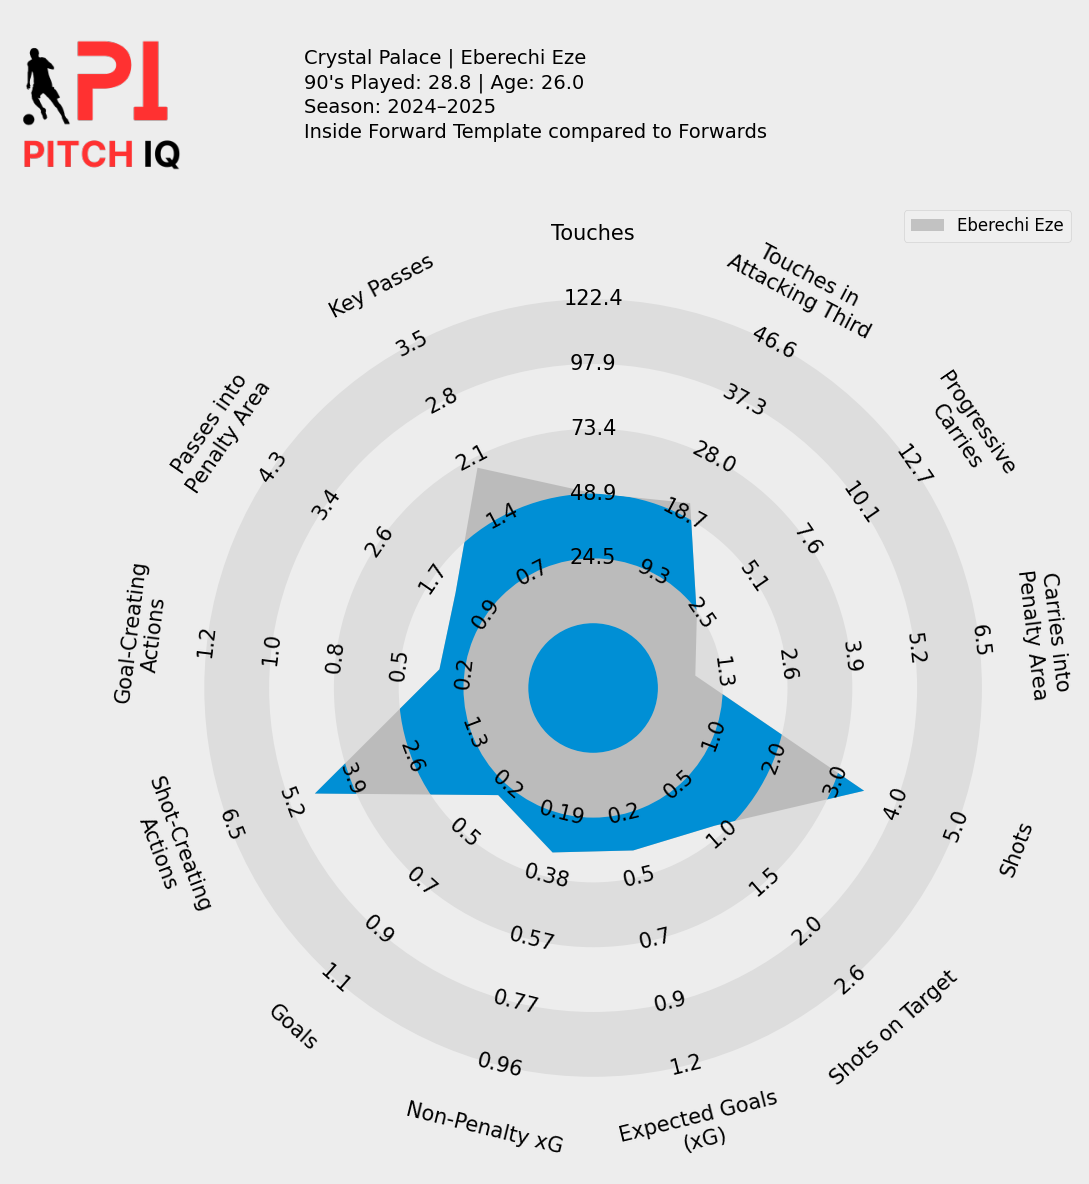

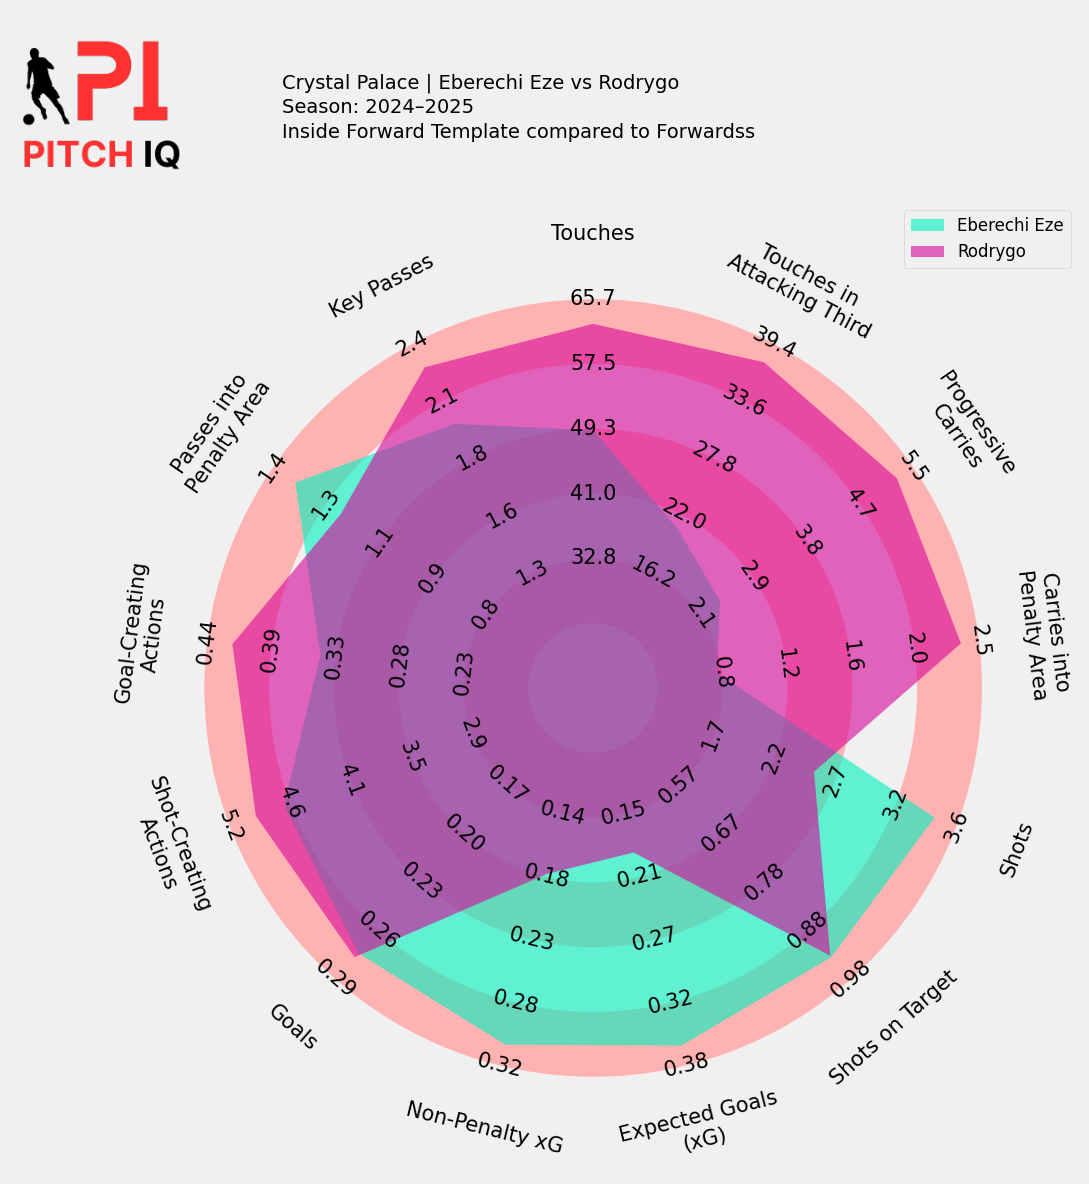

In [309]:
# Just one player
plot_role_based_comparison("Eberechi Eze", "inside_forward", CannonIQ_DB)

# Comparing two players
plot_role_based_comparison("Eberechi Eze", "inside_forward", CannonIQ_DB, comparative_list=["Rodrygo"])


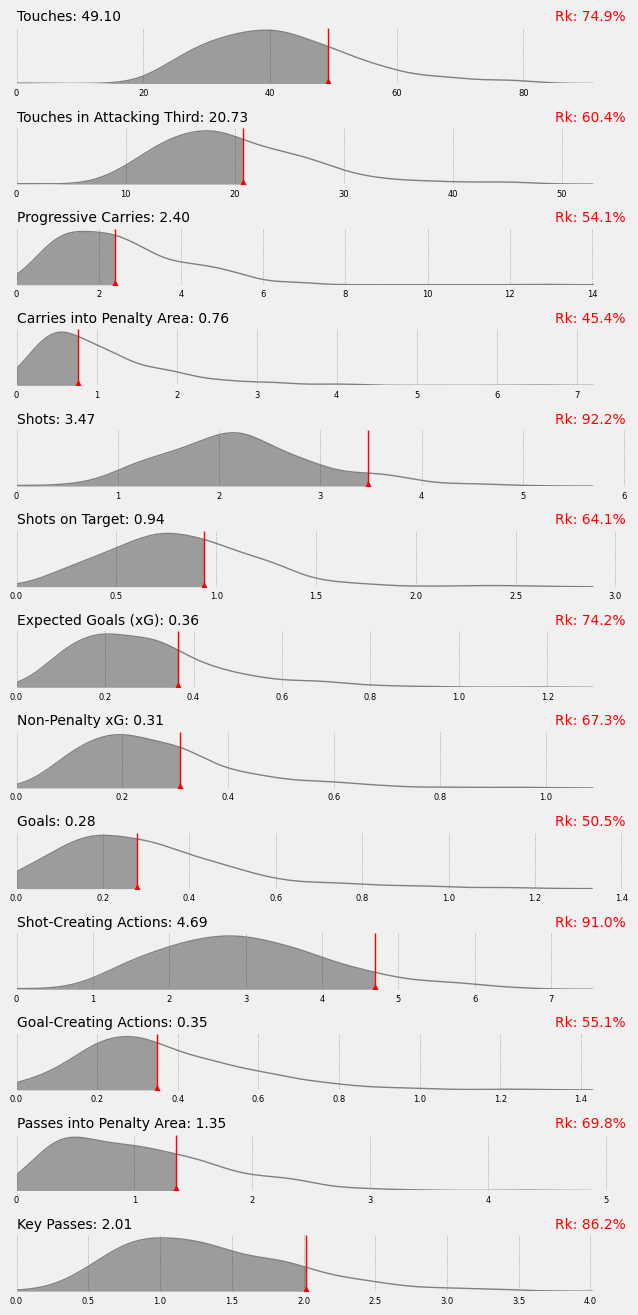

In [313]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
import matplotlib.style as style
import numpy as np

style.use('fivethirtyeight')

# Update KDE plot to match user style: stat labels aligned left, percentile shown beside them in red
# Updated function: stat name and value on the right, percentile rank underneath, using cleaned labels
# Final version: top-right stat title, %Rk label, and increased vertical spacing to prevent overlap
def plot_role_based_kde(player_name, role, df):
    if role not in player_role_templates:
        raise ValueError(f"Invalid role '{role}'.")

    params = player_role_templates[role]
    player_row = df[df['Player'] == player_name]
    if player_row.empty:
        raise ValueError(f"{player_name} not found in dataset.")

    pos_group = player_row['position_group'].values[0]
    filtered_df = df[(df['position_group'] == pos_group) & (df['90s'] > 10)]

    num_params = len(params)
    fig, axs = plt.subplots(num_params, 1, figsize=(7, num_params * 1.2))
    plt.subplots_adjust(hspace=0.8) 

    for i, param in enumerate(params):
        ax = axs[i]

        data = pd.to_numeric(filtered_df[param], errors='coerce').dropna().astype(np.float64)
        player_val = float(player_row[param].values[0])
        percentile = (data < player_val).mean() * 100

        # Pad left to start KDE from 0
        data = np.concatenate(([0], data))

        # KDE lines
        sns.kdeplot(data, color="gray", ax=ax, linewidth=1)
        sns.kdeplot(data, fill=True, alpha=0.35, color="black", ax=ax, linewidth=0,
                    clip=(data.min(), player_val))

        # Player marker
        ax.axvline(player_val, color='red', linestyle='-', lw=1)
        ax.plot(player_val, 0, '^', color='red', markersize=6)

        # Axes cleanup
        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('')
        ax.tick_params(axis='x', labelsize=6)
        ax.set_xlim(left=0)

        for spine in ax.spines.values():
            spine.set_visible(False)
        ax.xaxis.grid(True, linestyle=':', linewidth=0.5, color='gray')

        # Stat label as top-right "title"
        clean_label = clean_stat_mapping.get(param, param)
        ax.text(
            ax.get_xlim()[0],
            # + (ax.get_xlim()[1] * 0.1),

            ax.get_ylim()[1] * 1.2,
            f"{clean_label}: {player_val:.2f}",
            fontsize=10, ha='left', va='center', fontweight='book', color='black'
        )

        # Percentile rank below
        ax.text(
            ax.get_xlim()[1],
            ax.get_ylim()[1] * 1.2,
            f"Rk: {percentile:.1f}%",
            fontsize=10, ha='right', va='center', fontweight='book', color='red'
        )

    # Directory setup
    player_dir = f"Player_profiles/{player_name}"
    os.makedirs(player_dir, exist_ok=True)

    # Save KDE plot
    fig.savefig(f"{player_dir}/{player_name}_kde.png", dpi=300, bbox_inches="tight")

    plt.show()



plot_role_based_kde("Eberechi Eze", "inside_forward", CannonIQ_DB)


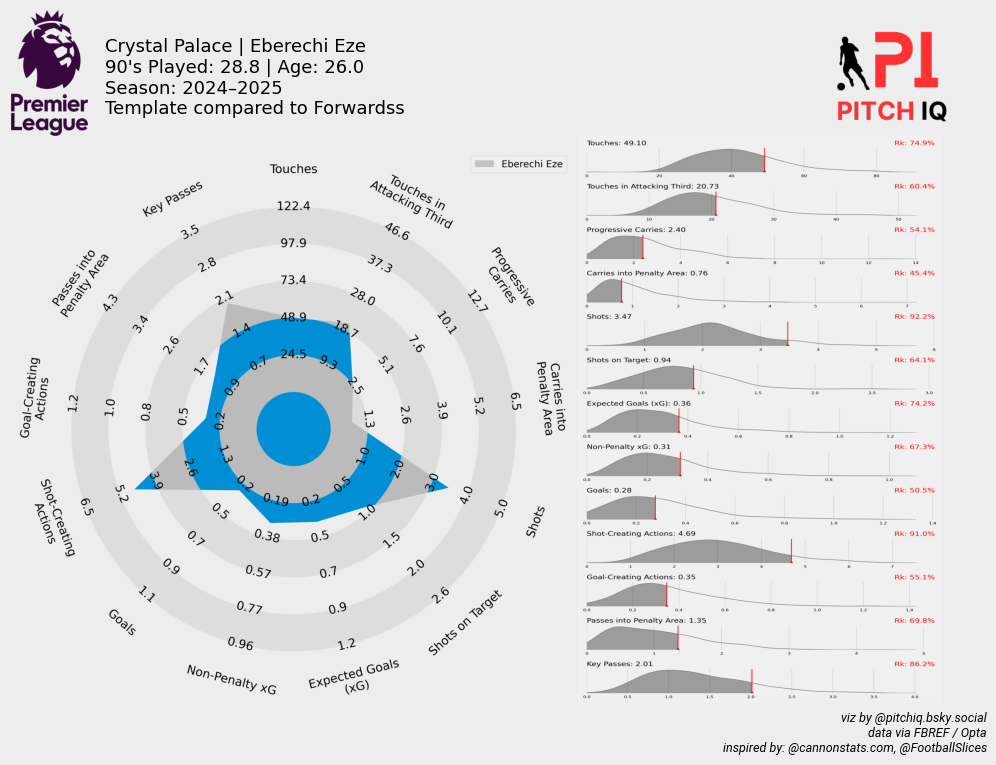

'Player_profiles/Eberechi Eze/Eberechi Eze_combined_profile.png'

In [315]:
from PIL import Image
import matplotlib.pyplot as plt

def combine_player_profile_plots(player_name, df,include_logos=True, title=None):

    main_player_row = df[df['Player'] == player_name]


    club = main_player_row['Squad'].values[0]
    player = main_player_row['Player'].values[0]
    age = float(main_player_row['Age'].values[0])
    nineties = float(main_player_row["90s"].values[0])
    season = "2024–2025"
    pos_group = main_player_row['position_group'].values[0]
    
    # Paths
    radar_path = f"Player_profiles/{player_name}/{player_name}_radar.png"
    kde_path = f"Player_profiles/{player_name}/{player_name}_kde.png"
    output_path = f"Player_profiles/{player_name}/{player_name}_combined_profile.png"

    # Open plots
    radar_img = Image.open(radar_path)
    kde_img = Image.open(kde_path)

    # Resize KDE to match radar height
    radar_w, radar_h = radar_img.size
    kde_img = kde_img.resize((int(kde_img.width), radar_h))
    kde_w, kde_h = kde_img.size

    # Create figure
    fig, ax = plt.subplots(figsize=(14, 7), dpi=100)
    fig.patch.set_facecolor('#ededed')  # FiveThirtyEight-style background
    ax.axis('off')

    # Combine into one image in Matplotlib canvas
    combined_img = Image.new("RGB", (radar_w + kde_w, radar_h), (237, 237, 237))
    combined_img.paste(radar_img, (0, 50))  # Push radar down
    combined_img.paste(kde_img, (radar_w, 0))  # Push KDE right

    # Show base image on canvas
    ax.imshow(combined_img)

    # Logos (in axes)
    if include_logos:
        try:
            league_icon = Image.open("/Users/stephenahiabah/Desktop/Code/cannoniq/Images/premier-league-2-logo.png")
            badge_img = Image.open("/Users/stephenahiabah/Desktop/Code/cannoniq/Images/piqmain.png")


            # League logo (left-top)
            ax_league = fig.add_axes([0.15, 0.88, 0.12, 0.18])  # ← Moved right (x: 0.01 → 0.03) and up (y: 0.82 → 0.87)
            ax_league.imshow(league_icon)
            ax_league.axis('off')

            # Badge logo (right-top)
            ax_badge = fig.add_axes([0.75, 0.88, 0.12, 0.18])   # ← Moved slightly left (x: 0.91 → 0.90) and up (y: 0.82 → 0.87)
            ax_badge.imshow(badge_img)
            ax_badge.axis('off')

        except FileNotFoundError:
            print("Logos not found – skipping logos.")

    # Title
    title = (
        f"{club} | {player}\n"
        f"90's Played: {nineties:.1f} | Age: {age:.1f}\n"
        f"Season: {season}\n"
        f"Template compared to {pos_group}s"
    )

    # add credits
    CREDIT_1 = "viz by @pitchiq.bsky.social\ndata via FBREF / Opta"
    CREDIT_2 = "inspired by: @cannonstats.com, @FootballSlices"

    fig.text(
        0.88, 0.00, f"{CREDIT_1}\n{CREDIT_2}", size=9,
        fontproperties=font_italic.prop, color="#000000",
        ha="right"
    )

    plt.suptitle(title, fontsize=13, fontweight='book', ha='left', x=0.25, y=1.02)

    # Save and show
    plt.savefig(output_path, bbox_inches='tight', facecolor=fig.get_facecolor())
    plt.show()

    return output_path

# Example run
combine_player_profile_plots("Eberechi Eze",CannonIQ_DB ,include_logos=True)


In [291]:
CannonIQ_DB

,Player,Nation,Pos,Squad,position_group,Passing_Score,Defending_Score,Creation_Score,Shooting_Score,player_name_match,scouting_url,match_logs,index,Age,Born,90s,Touches,Def Pen,Def 3rd,Mid 3rd,Att 3rd,Att Pen,Live,Take Ons - Attempted,Succ,Succ%,Tkld,Tkld%,Carries,Carries - TotDist,Carries - PrgDist,Carries - PrgC,Carries - 1/3,Carries - CPA,Carries - Mis,Carries - Dis,Rec,PrgR,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,Int,TklW,PKwon,PKcon,OG,Recov,Won,Lost,Won%,Total - Cmp,Total - Att,Total - Cmp%,TotDist,PrgDist,Short - Cmp,Short - Att,Short - Cmp%,Medium - Cmp,Medium - Att,Medium - Cmp%,Long - Cmp,Long - Att,Long - Cmp%,Ast,xAG,xA,A-xAG,KP,1/3,PPA,CrsPA,PrgP,Total - Tkl,Tackles - Def 3rd,Tackles - Mid 3rd,Tackles - Att 3rd,Dribblers- Tkl,Att,Tkl%,Total Blocks,Shots Blocked,Passes Blocked,Tkl+Int,Clr,Err,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,SCA,SCA90,SCA - PassLive,SCA - PassDead,TO,SCA - Sh,SCA - Fld,SCA - Def,GCA,GCA90,GCA - PassLive,GCA - PassDead,TO,GCA - Sh,GCA - Fld,GCA - Def,Dead,TB,Sw,TI,CK,In,Out,Str,Cmp,Blocks
0,Max Aarons,eng ENG,DF,Bournemouth,Defender,5.644444,6.252431,5.102952,4.500000,Max Aarons,https://fbref.com/en/players/774cf58b/scout/36...,https://fbref.com/en/players/774cf58b/matchlog...,0,24,2000,1.0,73.000000,2.000000,19.000000,40.000000,15.000000,0.000000,73.000000,2.000000,0.000000,0.0,1.000000,50.0,41.000000,152.000000,68.000000,1.000000,0.000000,0.000000,1.000000,0.000000,40.000000,3.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,50.000000,63.000000,79.4,887.000000,361.000000,21.000000,25.000000,84.0,24.000000,29.000000,82.8,4.000000,7.000000,57.1,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,8.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,100.0,3.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.09,2.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0,0.00000,0.000000,0.0,12.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.0,50.000000,1.000000
1,Rodrigo Abajas,es ESP,DF,Valencia,Defender,5.280621,6.487013,4.972562,4.501269,Rodrigo Abajas,https://fbref.com/en/players/69c99fce/scout/36...,https://fbref.com/en/players/69c99fce/matchlog...,2,21,2003,0.7,51.428571,1.428571,11.428571,27.142857,12.857143,1.428571,51.428571,1.428571,1.428571,100.0,0.000000,0.0,18.571429,144.285714,95.714286,4.285714,2.857143,1.428571,0.000000,2.857143,22.857143,4.285714,1.428571,0.000000,0.0,2.857143,0.000000,1.428571,1.428571,1.428571,2.857143,0.000000,0.000000,0.0,2.857143,0.000000,1.428571,0.0,24.285714,41.428571,58.6,382.857143,157.142857,15.714286,20.000000,78.6,5.714286,10.000000,57.1,2.857143,10.000000,28.6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.857143,4.285714,2.857143,1.428571,0.000000,4.285714,4.285714,100.0,1.428571,0.000000,1.428571,5.714286,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0,0.00000,0.000000,0.0,11.428571,0.000000,0.000000,11.428571,0.000000,0.000000,0.000000,0.0,24.285714,2.857143
2,James Abankwah,ie IRL,"DF,MF",Udinese,Defender,5.550083,5.869027,4.517253,4.501903,James Abankwah,https://fbref.com/en/players/4b7a9fcc/scout/36...,https://fbref.com/en/players/4b7a9fcc/matchlog...,3,20,2004,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,4.000000,3.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.0,7.000000,2.000000,2.000000,50.0,

In [335]:
player_role_percentile_templates = {
    "Ball Playing CB": [
        # Defensive
        "Tkl%", "Int", "Blocks", "Passes Blocked", "Clr",
        # Possession
        "Touches", "Total - Cmp%", "Short - Cmp%", "PrgR", "Carries - PrgDist",
        # Attacking
        "xA", "KP", "Long - Cmp%", "Sh/90", "Ast"
    ],
    "Classic CB": [
        # Defensive
        "Tkl%", "Int", "Blocks", "Clr", "Recov",
        # Possession
        "Touches", "Total - Cmp%", "Long - Cmp%", "Short - Cmp%", "PrgR",
        # Attacking
        "xG", "KP", "xA", "Sh/90", "Ast"
    ],
    "Classic Fullback": [
        # Defensive
        "Tkl%", "Int", "Blocks", "Tkl+Int", "Passes Blocked",
        # Possession
        "Carries - PrgDist", "Touches", "PrgR", "Total - Cmp%", "Att 3rd",
        # Attacking
        "xA", "KP", "CrsPA", "Ast", "Sh/90"
    ],
    "Inverted Fullback": [
        # Defensive
        "Tkl%", "Int", "Blocks", "Clr", "Tkl+Int",
        # Possession
        "PrgR", "Carries - PrgDist", "Touches", "Short - Cmp%", "Total - Cmp%",
        # Attacking
        "xA", "KP", "CrsPA", "Ast", "xG"
    ],
    "Attacking Fullback": [
        # Defensive
        "Tkl%", "Int", "Blocks", "Clr", "Tkl+Int",
        # Possession
        "Carries - PrgC", "Carries - PrgDist", "Touches", "PrgR", "Total - Cmp%",
        # Attacking
        "xA", "KP", "CrsPA", "Ast", "Sh/90"
    ],
    "Destroyer DM": [
        # Defensive
        "Tkl%", "Tkl+Int", "Blocks", "Int", "Passes Blocked",
        # Possession
        "Touches", "Total - Cmp%", "PrgR", "Carries - PrgDist", "Short - Cmp%",
        # Attacking
        "xA", "KP", "Ast", "Sh/90", "Long - Cmp%"
    ],
    "Deep Lying Playmaker CM": [
        # Defensive
        "Tkl%", "Int", "Blocks", "Tkl+Int", "Passes Blocked",
        # Possession
        "Total - Cmp%", "PrgP", "Touches", "Carries - PrgDist", "Short - Cmp%",
        # Attacking
        "xA", "KP", "Ast", "Long - Cmp%", "Sh/90"
    ],
    "Box to Box CM": [
        # Defensive
        "Tkl%", "Int", "Tkl+Int", "Blocks", "Passes Blocked",
        # Possession
        "Touches", "Carries - PrgC", "PrgR", "Total - Cmp%", "Short - Cmp%",
        # Attacking
        "xG", "xA", "KP", "Ast", "Sh/90"
    ],
    "Playmaker CM": [
        # Defensive
        "Tkl%", "Int", "Blocks", "Tkl+Int", "Passes Blocked",
        # Possession
        "Touches", "PrgP", "Carries - PrgDist", "Short - Cmp%", "Total - Cmp%",
        # Attacking
        "xA", "KP", "Ast", "xG", "SCA90"
    ],
    "Classic AM": [
        # Defensive
        "Tkl%", "Int", "Blocks", "Tkl+Int", "Pressures",
        # Possession
        "Touches", "Carries - PrgC", "PrgR", "Total - Cmp%", "Short - Cmp%",
        # Attacking
        "xA", "KP", "Ast", "xG", "Sh/90"
    ],
    "Inside Forward": [
        # Defensive
        "Tkl%", "Int", "Blocks", "Tkl+Int", "Dribblers- Tkl",
        # Possession
        "Carries - PrgDist", "Touches", "PrgR", "Total - Cmp%", "Short - Cmp%",
        # Attacking
        "xG", "xA", "KP", "Sh/90", "Ast"
    ],
    "Winger": [
        # Defensive
        "Tkl%", "Int", "Blocks", "Tkl+Int", "Dribblers- Tkl",
        # Possession
        "Carries - PrgDist", "Carries - PrgC", "Touches", "PrgR", "Take Ons - Attempted",
        # Attacking
        "xA", "KP", "Ast", "Sh/90", "CrsPA"
    ],
    "Center Forward": [
        # Defensive
        "Tkl%", "Int", "Blocks", "Pressures", "Dribblers- Tkl",
        # Possession
        "Touches", "Carries - PrgC", "PrgR", "Short - Cmp%", "Rec",
        # Attacking
        "xG", "xA", "KP", "Sh/90", "Ast"
    ],
    "False 9": [
        # Defensive
        "Tkl%", "Int", "Blocks", "Tkl+Int", "Pressures",
        # Possession
        "Touches", "Carries - PrgC", "Total - Cmp%", "Short - Cmp%", "Rec",
        # Attacking
        "xG", "xA", "KP", "Ast", "Sh/90"
    ]
}


In [355]:
from mplsoccer import PyPizza
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
import numpy as np
import os


def create_percentile_Pizza(player_name, role, df, role_templates, output_dir):
    font_normal = FontManager('https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Regular.ttf')
    font_italic = FontManager('https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Italic.ttf')
    font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/RobotoSlab[wght].ttf')

    if role not in role_templates:
        raise ValueError(f"Invalid role '{role}'.")

    params = role_templates[role]
    readable_params = [clean_stat_mapping.get(p, p) for p in params]
    player_row = df[df['Player'] == player_name]
    if player_row.empty:
        raise ValueError(f"{player_name} not found in dataset.")

    pos_group = player_row['position_group'].values[0]
    filtered_df = df[(df['position_group'] == pos_group) & (df['90s'] > 10)]

    percentiles = []
    for param in params:
        data = pd.to_numeric(filtered_df[param], errors='coerce').dropna().astype(np.float64)
        player_val = float(player_row[param].values[0])
        percentile = round((data < player_val).mean() * 100)
        percentiles.append(percentile)
    print(role)

    if "cb" in role.lower():
        slice_colors = ["#8B0000"] * 5 + ["#B22222"] * 5 + ["#DC143C"] * 5
    elif any(pos in role.lower() for pos in ["cm", "dm"]):
        slice_colors = ["#097969"] * 5 + ["#AFE1AF"] * 5 + ["#088F8F"] * 5
    elif any(pos in role.lower() for pos in ["am", "winger"]):
        slice_colors = ["#00008B"] * 5 + ["#4169E1"] * 5 + ["#87CEFA"] * 5
    elif any(pos in role.lower() for pos in ["f9", "forward"]):
        slice_colors = ["#B0B0B0"] * 5 + ["#808080"] * 5 + ["#404040"] * 5

    else:
        slice_colors = ["#D70232"] * 5 + ["#FF9300"] * 5 + ["#1A78CF"] * 5
    text_colors = ["#000000"] * 15



    baker = PyPizza(
        params=readable_params,
        background_color="#EBEBE9",
        straight_line_color="#EBEBE9",
        straight_line_lw=1,
        last_circle_lw=0,
        other_circle_lw=0,
        inner_circle_size=20
    )

    fig, ax = baker.make_pizza(
        percentiles,
        figsize=(8, 8.5),
        color_blank_space="same",
        slice_colors=slice_colors,
        value_colors=text_colors,
        value_bck_colors=slice_colors,
        blank_alpha=0.4,
        kwargs_slices=dict(edgecolor="#F2F2F2", zorder=2, linewidth=1),
        kwargs_params=dict(color="#000000", fontsize=9, va="center", fontproperties=font_normal.prop),
        kwargs_values=dict(
            color="#000000", fontsize=11, fontproperties=font_normal.prop, zorder=3,
            bbox=dict(edgecolor="#000000", facecolor="cornflowerblue", boxstyle="round,pad=0.2", lw=1)
        )
    )

    club = player_row['Squad'].values[0]
    age = float(player_row['Age'].values[0])
    nineties = float(player_row['90s'].values[0])



    fig.text(0.05, 0.985, f"{player_name} - {club} - {role} Template", size=14, ha="left", fontproperties=font_bold.prop, color="#000000")
    fig.text(0.05, 0.963, f"Percentile Rank vs Top-Five League {pos_group} | Season 2024-25", size=10, ha="left", fontproperties=font_bold.prop, color="#000000")
    fig.text(0.08, 0.925, "Attacking          Possession        Defending", size=12, fontproperties=font_bold.prop, color="#000000")

    # Legend color mapping based on role
    if "CB" in role:
        att_color = "#DC143C"       # light red
        pos_color = "#B22222"       # medium red
        def_color = "#8B0000"       # dark red
    elif "CM" in role or "DM" in role:
        att_color = "#088F8F"       # light green
        pos_color = "#AFE1AF"       # medium green
        def_color = "#097969"       # dark green
    elif "AM" in role or "Winger" in role:
        att_color = "#87CEFA"       # light blue
        pos_color = "#4169E1"       # medium blue
        def_color = "#00008B"       # dark blue
    elif "F9" in role or "Forward" in role:
        att_color = "#696969"       # light grey
        pos_color = "#A9A9A9"       # dark grey
        def_color = "#D3D3D3"       # dim grey
    else:
        att_color = "#1A78CF"
        pos_color = "#FF9300"
        def_color = "#D70232"

    # Update legend color rectangles
    fig.patches.extend([
        plt.Rectangle((0.05, 0.9225), 0.025, 0.021, fill=True, color=att_color, transform=fig.transFigure, figure=fig),
        plt.Rectangle((0.2, 0.9225), 0.025, 0.021, fill=True, color=pos_color, transform=fig.transFigure, figure=fig),
        plt.Rectangle((0.351, 0.9225), 0.025, 0.021, fill=True, color=def_color, transform=fig.transFigure, figure=fig),
    ])


    # Credits
    CREDIT_1 = "@cannoniq.bsky.com\ndata via FBREF / Opta"
    CREDIT_2 = "inspired by: @Worville, @FootballSlices"
    fig.text(0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9, fontproperties=font_italic.prop, color="#000000", ha="right")

    try:
        ax3 = fig.add_axes([0.80, 0.075, 0.15, 1.75])
        ax3.axis('off')
        img = image.imread('/Users/stephenahiabah/Desktop/Code/cannoniq/Images/piqmain.png')
        ax3.imshow(img)
    except FileNotFoundError:
        print("Logo image not found.")

    os.makedirs(output_dir, exist_ok=True)
    save_path = os.path.join(output_dir, f"{player_name}_percentile_pizza.png")
    plt.savefig(save_path, dpi=500, facecolor="#EBEBE9", bbox_inches="tight", edgecolor="none", transparent=False)
    plt.show()

    return save_path


Inside Forward


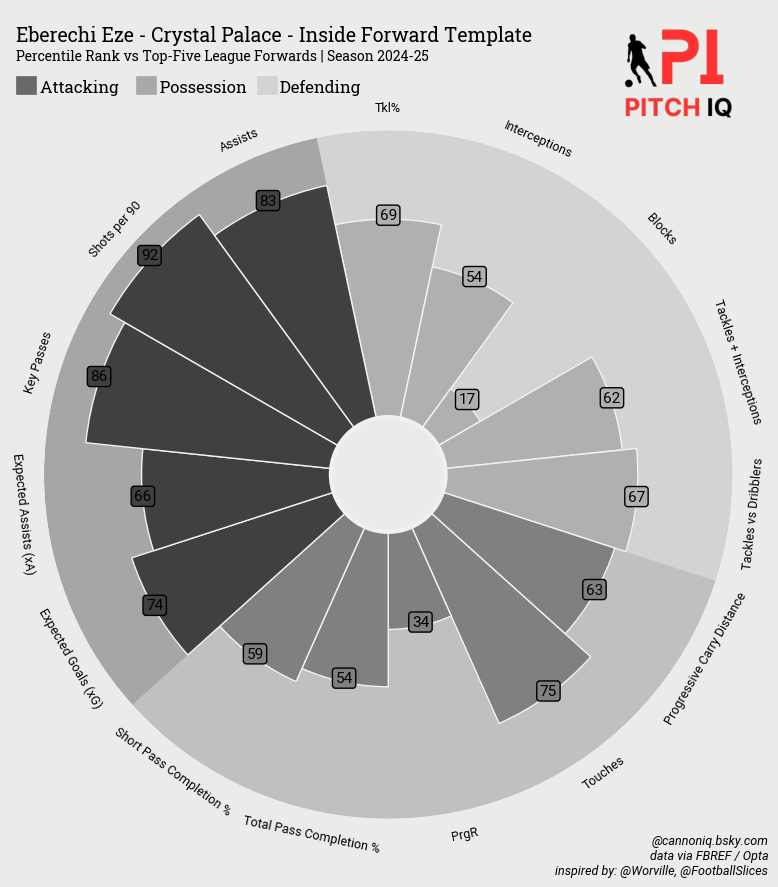

'Player_profiles/Eberechi Eze/Eberechi Eze_percentile_pizza.png'

In [356]:
create_percentile_Pizza(
    player_name="Eberechi Eze",
    role="Inside Forward",
    df=CannonIQ_DB,
    role_templates=player_role_percentile_templates,
    output_dir=f"Player_profiles/Eberechi Eze"
)

Winger


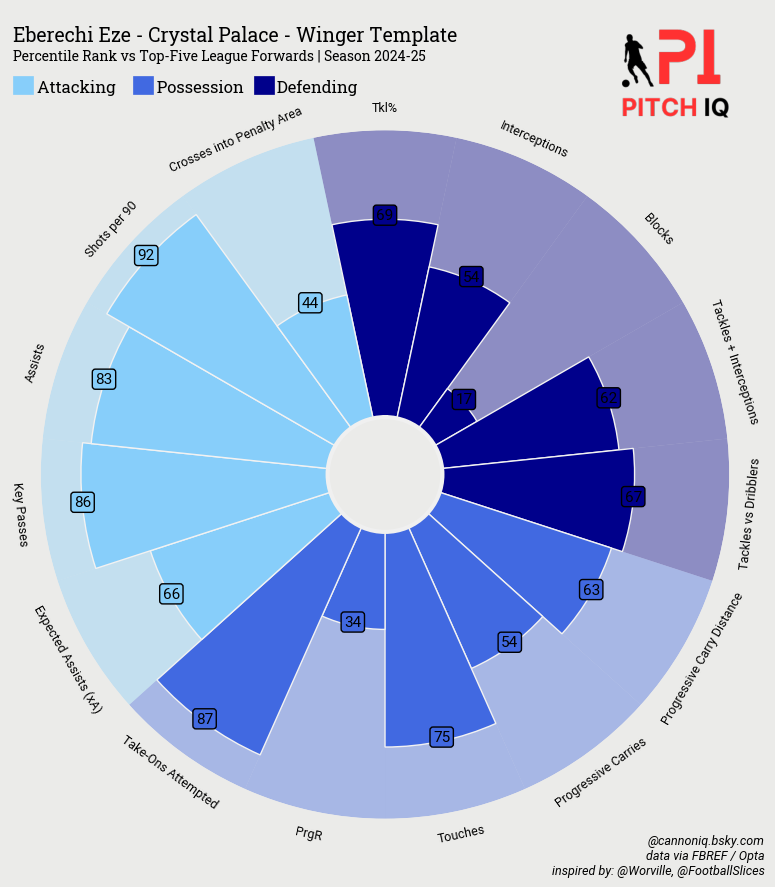

'Player_profiles/Eberechi Eze/Eberechi Eze_percentile_pizza.png'

In [357]:
create_percentile_Pizza(
    player_name="Eberechi Eze",
    role="Winger",
    df=CannonIQ_DB,
    role_templates=player_role_percentile_templates,
    output_dir=f"Player_profiles/Eberechi Eze"
)

In [229]:
main_player_row = CannonIQ_DB[CannonIQ_DB['Player'] == "Martin Ødegaard"]
main_player_row

,Player,Nation,Pos,Squad,position_group,Passing_Score,Defending_Score,Creation_Score,Shooting_Score,player_name_match,scouting_url,match_logs,index,Age,Born,90s,Touches,Def Pen,Def 3rd,Mid 3rd,Att 3rd,Att Pen,Live,Take Ons - Attempted,Succ,Succ%,Tkld,Tkld%,Carries,Carries - TotDist,Carries - PrgDist,Carries - PrgC,Carries - 1/3,Carries - CPA,Carries - Mis,Carries - Dis,Rec,PrgR,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,Int,TklW,PKwon,PKcon,OG,Recov,Won,Lost,Won%,Total - Cmp,Total - Att,Total - Cmp%,TotDist,PrgDist,Short - Cmp,Short - Att,Short - Cmp%,Medium - Cmp,Medium - Att,Medium - Cmp%,Long - Cmp,Long - Att,Long - Cmp%,Ast,xAG,xA,A-xAG,KP,1/3,PPA,CrsPA,PrgP,Total - Tkl,Tackles - Def 3rd,Tackles - Mid 3rd,Tackles - Att 3rd,Dribblers- Tkl,Att,Tkl%,Total Blocks,Shots Blocked,Passes Blocked,Tkl+Int,Clr,Err,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,SCA,SCA90,SCA - PassLive,SCA - PassDead,TO,SCA - Sh,SCA - Fld,SCA - Def,GCA,GCA90,GCA - PassLive,GCA - PassDead,TO,GCA - Sh,GCA - Fld,GCA - Def,Dead,TB,Sw,TI,CK,In,Out,Str,Cmp,Blocks
2577,Martin Ødegaard,no NOR,MF,Arsenal,Central Midfielders,8.270282,6.680324,8.050561,6.66959,Martin Odegaard,https://fbref.com/en/players/79300479/scout/36...,https://fbref.com/en/players/79300479/matchlog...,2851,25,1998,25.8,65.658915,0.348837,4.883721,27.44186,33.914729,4.457364,65.620155,2.286822,0.968992,42.4,1.24031,54.2,45.503876,288.527132,146.20155,3.565891,3.294574,1.007752,1.472868,1.550388,51.782946,5.968992,0.155039,0.0,0.0,0.465116,0.891473,0.03876,3.333333,0.232558,0.426357,0.0,0.0,0.0,3.75969,0.310078,0.271318,53.3,47.945736,58.100775,82.5,745.620155,211.627907,26.27907,29.031008,90.5,17.403101,20.03876,86.8,3.100775,5.658915,54.8,0.310078,0.209302,0.25969,0.100775,2.44186,5.116279,3.333333,0.193798,10.0,0.736434,0.348837,0.271318,0.116279,0.155039,0.968992,16.0,0.193798,0.0,0.193798,0.968992,0.232558,0.03876,0.116279,1.860465,0.581395,31.3,1.86,0.58,0.00155,0.005039,0.744186,0.116279,0.03876,0.03876,0.186047,0.155039,0.003101,-0.069767,-0.077519,4.806202,4.8,3.914729,0.503876,3,0.193798,0.077519,0.0,0.697674,0.7,0.542636,0.077519,1,0.03876,0.0,0.0,4.418605,0.968992,0.116279,0.465116,1.434109,1.20155,0.0,0.0,47.945736,1.046512


In [304]:
import time 
def generate_advanced_data(scout_links):
    appended_data_per90 = []
    appended_data_percent = []
    for x in scout_links:
        warnings.filterwarnings("ignore")
        url = x
        page =requests.get(url)
        soup = BeautifulSoup(page.content, 'html.parser')
        name = [element.text for element in soup.find_all("span")]
        name = name[7]
        html_content = requests.get(url).text
        df = pd.read_html(html_content)
        df[-1].columns = df[-1].columns.droplevel(0) # drop top header row
        stats = df[-1]
        # stats = df[0]
        advanced_stats = stats.loc[(stats['Statistic'] != "Statistic" ) & (stats['Statistic'] != ' ')]
        advanced_stats = advanced_stats.dropna(subset=['Statistic',"Per 90", "Percentile"])
        per_90_df = advanced_stats[['Statistic',"Per 90",]].set_index("Statistic").T
        per_90_df["Name"] = name
        percentile_df = advanced_stats[['Statistic',"Percentile",]].set_index("Statistic").T
        percentile_df["Name"] = name
        appended_data_per90.append(per_90_df)
        appended_data_percent.append(percentile_df)
        del df, soup
        time.sleep(10)
        print(name)
    appended_data_per90 = pd.concat(appended_data_per90)
    appended_data_per90 = appended_data_per90.reset_index(drop=True)
    appended_data_per90 = appended_data_per90[['Name'] + [col for col in appended_data_per90.columns if col != 'Name']]
    appended_data_per90 = appended_data_per90.loc[:,~appended_data_per90.columns.duplicated()]
    appended_data_percentile = pd.concat(appended_data_percent)
    appended_data_percentile = appended_data_percentile.reset_index(drop=True)
    # del appended_data_percentile.columns.name
    appended_data_percentile = appended_data_percentile[['Name'] + [col for col in appended_data_percentile.columns if col != 'Name']]
    appended_data_percentile = appended_data_percentile.loc[:,~appended_data_percentile.columns.duplicated()]
    list_of_dfs = [appended_data_per90,appended_data_percentile]
    return list_of_dfs

In [305]:
def create_single_Pizza(df_in,player_name): 
    # parameter list
    params = [
        "Non-Penalty Goals", "npxG + xAG", "Assists",
        "Shot-Creating Actions", "Carries into Penalty Area",
        "Touches", "Progressive Passes", "Progressive Carries",
        "Passes into Penalty Area", "Crosses",
        "Interceptions", "Tackles Won",
        "Passes Blocked", "Ball Recoveries", "Aerials Won"
    ]

    subset_of_data = df_in.query('Player == @player_name' )
    scout_links = list(subset_of_data.scouting_url.unique())
    appended_data_percentile = generate_advanced_data(scout_links)[1]
    appended_data_percentile = appended_data_percentile[params]
    cols = appended_data_percentile.columns
    appended_data_percentile[cols] = appended_data_percentile[cols].apply(pd.to_numeric)
    params = list(appended_data_percentile.columns)
    # params = params[1:]


    values = appended_data_percentile.iloc[0].values.tolist()
    # values = values[1:]

    teams = subset_of_data['Squad'].unique()[0]


    style.use('fivethirtyeight')


    # color for the slices and text
    slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
    text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

    # instantiate PyPizza class
    baker = PyPizza(
        params=params,                  # list of parameters
        background_color="#EBEBE9",     # background color
        straight_line_color="#EBEBE9",  # color for straight lines
        straight_line_lw=1,             # linewidth for straight lines
        last_circle_lw=0,               # linewidth of last circle
        other_circle_lw=0,              # linewidth for other circles
        inner_circle_size=20            # size of inner circle
    )

    # plot pizza
    fig, ax = baker.make_pizza(
        values,                          # list of values
        figsize=(8, 8.5),                # adjust figsize according to your need
        color_blank_space="same",        # use same color to fill blank space
        slice_colors=slice_colors,       # color for individual slices
        value_colors=text_colors,        # color for the value-text
        value_bck_colors=slice_colors,   # color for the blank spaces
        blank_alpha=0.4,                 # alpha for blank-space colors
        kwargs_slices=dict(
            edgecolor="#F2F2F2", zorder=2, linewidth=1
        ),                               # values to be used when plotting slices
        kwargs_params=dict(
            color="#000000", fontsize=9,
            fontproperties=font_normal.prop, va="center"
        ),                               # values to be used when adding parameter
        kwargs_values=dict(
            color="#000000", fontsize=11,
            fontproperties=font_normal.prop, zorder=3,
            bbox=dict(
                edgecolor="#000000", facecolor="cornflowerblue",
                boxstyle="round,pad=0.2", lw=1
            )
        )                                # values to be used when adding parameter-values
    )

    # add title
    fig.text(
        0.05, 0.985, f"{player_name} - {teams}", size=14,
        ha="left", fontproperties=font_bold.prop, color="#000000"
    )

    # add subtitle
    fig.text(
        0.05, 0.963,
        f"Percentile Rank vs Top-Five League {subset_of_data.position_group.unique()[0]} | Season 2024-25",
        size=10,
        ha="left", fontproperties=font_bold.prop, color="#000000"
    )

    # add credits
    CREDIT_1 = "@stephenaq7\ndata via FBREF / Opta"
    CREDIT_2 = "inspired by: @Worville, @FootballSlices"

    fig.text(
        0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,
        fontproperties=font_italic.prop, color="#000000",
        ha="right"
    )

    # add text
    fig.text(
        0.08, 0.925, "Attacking          Possession        Defending", size=12,
        fontproperties=font_bold.prop, color="#000000"
    )

    # add rectangles
    fig.patches.extend([
        plt.Rectangle(
            (0.05, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
            transform=fig.transFigure, figure=fig
        ),
        plt.Rectangle(
            (0.2, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
            transform=fig.transFigure, figure=fig
        ),
        plt.Rectangle(
            (0.351, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
            transform=fig.transFigure, figure=fig
        ),
    ])

    # add image
    ### Add Stats by Steve logo
    ax3 = fig.add_axes([0.80, 0.075, 0.15, 1.75])
    ax3.axis('off')
    img = image.imread('/Users/stephenahiabah/Desktop/Code/cannoniq/Images/piqmain.png')
    ax3.imshow(img)
    plt.savefig(
	f"/Users/stephenahiabah/Desktop/Code/cannoniq/Substack_Images/ML_DOF_DCAM/{player_name} - plot.png",
	dpi = 500,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)
    plt.show()

173cm


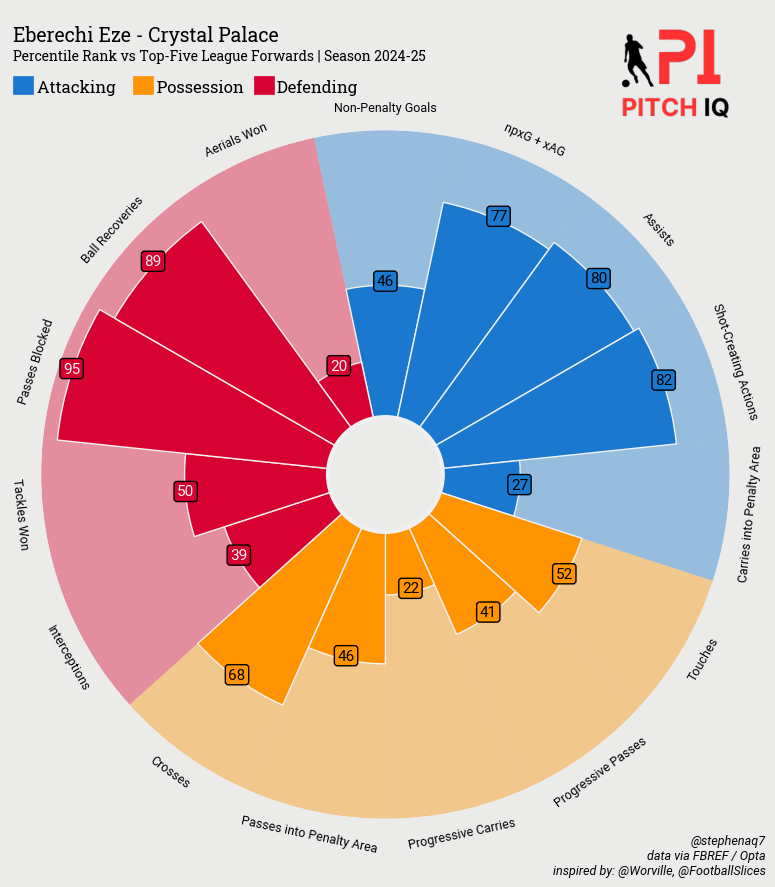

In [316]:
CannonIQ_DB =CannonIQ_DB.drop(columns=['TO'], errors='ignore')
create_single_Pizza(CannonIQ_DB, player_name="Eberechi Eze")